In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing NLP plugins
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer

#Import our TfidFVectorizer plugin
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/drive/MyDrive/cleaned_data.csv")
df = df.drop('Unnamed: 0', axis = 1)
print(df)

                                                  Title  ...        Source
0     Michigan wants to lead U.S. in electric vehicl...  ...      Bridgemi
1     Republicans’ hold on Lansing power could grow ...  ...      Bridgemi
2     Dueling gatherings highlight split as Michigan...  ...      Bridgemi
3     Michigan counties dump mask rules for thousand...  ...      Bridgemi
4     Gov. Gretchen Whitmer signs $70B Michigan budg...  ...      Bridgemi
...                                                 ...  ...           ...
1727  The Climate Conversations - S2: The green cons...  ...  Channel News
1728  Heart of the Matter - S2: What are the challen...  ...  Channel News
1729  The Climate Conversations - S2: Can our homes ...  ...  Channel News
1730  Heart of the Matter - S2: Inside the alternate...  ...  Channel News
1731  Heart of the Matter - S2: Malaysia’s great gam...  ...  Channel News

[1732 rows x 3 columns]


In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
stop_words = stopwords.words('english')
#Adds cnn to the stop_words list above
stop_words.extend(["cnn","n't"])

def tokenizer(text):
 
    list_of_tokens = text.split(' ')
    
    stemmer = PorterStemmer()
    
    #list of cleaned_tokens
    cleaned_tokens = []

    #Remove Stopwords
    for token in list_of_tokens:
        if (not token in stop_words):
            
            token_stemmed = stemmer.stem(token)
                
            cleaned_tokens.append(token_stemmed)
            
    return cleaned_tokens

In [5]:
df.dropna(subset=['Text'],inplace=True)

In [6]:
min_df_range = range(50, 350, 50)
num_tokens_list = []

for i in min_df_range:
    #Initiate the model
    tf = TfidfVectorizer(tokenizer = tokenizer, min_df = i, ngram_range =(1,3))
    print('Initiliaze')
    #Fit on the corpus
    tf.fit(df['Text'])
    print('Fit')
    #Transform the model
    num_tokens = tf.transform(df['Text'])
    print('Transform')
    #Extract and count:
    count_tokens = pd.DataFrame(columns = tf.get_feature_names(), data = num_tokens.toarray())
    #min_df_tokens = tf()
    print(f'Vectorization for min_df = {i} excuted.')
    
    num_tokens_list.append(count_tokens.shape[1])

Initiliaze
Fit
Transform
Vectorization for min_df = 50 excuted.
Initiliaze
Fit
Transform
Vectorization for min_df = 100 excuted.
Initiliaze
Fit
Transform
Vectorization for min_df = 150 excuted.
Initiliaze
Fit
Transform
Vectorization for min_df = 200 excuted.
Initiliaze
Fit
Transform
Vectorization for min_df = 250 excuted.
Initiliaze
Fit
Transform
Vectorization for min_df = 300 excuted.


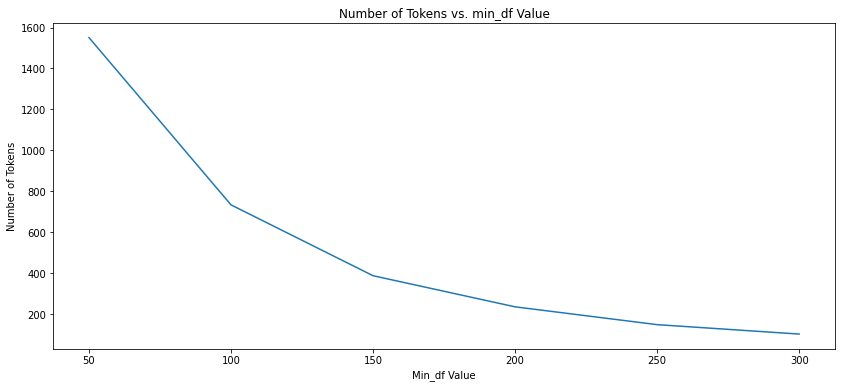

In [7]:
plt.figure(figsize = (14, 6))
plt.plot(min_df_range, num_tokens_list)
plt.title('Number of Tokens vs. min_df Value')
plt.xlabel('Min_df Value')
plt.ylabel('Number of Tokens')
plt.show()

In [8]:
tf_final = TfidfVectorizer(tokenizer = tokenizer, min_df = 50, ngram_range = (1,3), lowercase = True)
#Fit & the data
tokens_tfidf_matrix = tf_final.fit_transform(df['Text'])

In [10]:
!pip install pyldavis

     |████████████████████████████████| 1.7 MB 36.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 44.2 MB/s 
     |████████████████████████████████| 15.7 MB 189 kB/s 
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=fd69b66a0162d48946b48c3220c052de913bf04fdba7e2c683f9268111da1cbb
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take in

In [9]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

#Import visualization tools for LDA models
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [10]:
num_topics = 20

lda = LDA(n_components = num_topics, n_jobs = -1)
lda.fit(tokens_tfidf_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [12]:
pyLDAvis.sklearn.prepare(lda, tokens_tfidf_matrix, tf_final)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.031509  0.052330       1        1  84.662807
3      0.276623 -0.148562       2        1   2.664092
4     -0.200082 -0.207215       3        1   2.166942
11     0.002772  0.027071       4        1   0.687820
2     -0.009665  0.034354       5        1   0.677568
13     0.004461  0.019746       6        1   0.658459
18    -0.011669  0.034419       7        1   0.650132
15    -0.007329  0.025242       8        1   0.642468
9     -0.005939  0.017429       9        1   0.635645
16    -0.012508  0.022858      10        1   0.635416
10    -0.008573  0.016387      11        1   0.612007
1     -0.008468  0.015474      12        1   0.607418
8     -0.005552  0.014040      13        1   0.604027
7     -0.008725  0.015662      14        1   0.598836
0     -0.006724  0.014472      15        1   0.595045
12    -0.005182  0.014876      16        1   0.594445
6     -0.006716  0.011287      17        1   0.586407
17    -0.009843  0.010131      18        1   0.584216
19    -0.002321  0.007616      19        1   0.579071
14    -0.006068  0.002383      20        1   0.557178, topic_info=          Term       Freq      Total Category  logprob  loglift
1437    vaccin  58.000000  58.000000  Default  30.0000  30.0000
1161       say  45.000000  45.000000  Default  29.0000  29.0000
227       case  28.000000  28.000000  Default  28.0000  28.0000
933        one  42.000000  42.000000  Default  27.0000  27.0000
326   covid-19  32.000000  32.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
265      close   0.048337  13.368032  Topic20  -7.3467  -0.4324
351       day.   0.048337   4.881328  Topic20  -7.3467   0.5751
641    highest   0.048337   5.596075  Topic20  -7.3467   0.4384
1236   smarter   0.048337   3.941284  Topic20  -7.3467   0.7890
7        (cnn)   0.048337  13.264517  Topic20  -7.3467  -0.4246

[861 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
5         1  0.839202       &
7         1  0.829280   (cnn)
11        1  0.830553       -
11        5  0.055370       -
11       17  0.055370       -
...     ...       ...     ...
1530      2  0.032689    year
1535      1  0.821995  years.
1539      1  0.889875   young
1542      1  0.964779       –
1543      1  0.976713       —

[657 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 5, 12, 3, 14, 19, 16, 10, 17, 11, 2, 9, 8, 1, 13, 7, 18, 20, 15])

In [13]:
import joblib
joblib.dump(lda,'/content/drive/MyDrive/sk_lda_20.pkl')

['/content/drive/MyDrive/sk_lda_20.pkl']

In [14]:
pyLDAvis.save_html(data = (pyLDAvis.sklearn.prepare(lda, tokens_tfidf_matrix, tf_final)), fileobj = '/content/drive/MyDrive/sk_lda+_viz_20.html')